In [1]:
import os
import sys
sys.path.append(os.path.abspath(".."))
import pickle
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = False
import seaborn as sns
sns.set()
# universal_color
palette = sns.color_palette(['#E69F00', '#56B4E9', '#009E73', '#F0E442', '#0072B2', '#D55E00', '#CC79A7', '#000000'])
import bayesianssa

/work/SSA/GitHub/bayesianssa/_bayesianssa.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


### Table 2

In [2]:
generated_data = pd.read_csv('../data/synthetic_perturbation_data.csv', index_col=0)

In [3]:
generated_data.columns = ['O', 'P', 'Q']

In [4]:
generated_data.groupby(['O', 'P']).sum()

Q
O     P      
SUCCt GND   0
      PPC  25
      PTS   0

### Table 4

In [5]:
real_data = pd.read_csv('../data/real_perturbation_data.csv')

In [6]:
real_data.groupby(['Observation target', 'Perturbation target']).sum()

Qualitative response
Observation target Perturbation target                      
SUCCt              CS                                      2
                   FBP                                     0
                   ICL                                     3
                   LDH                                     0
                   ME1                                     0
                   ME2                                     0
                   PCK                                     3
                   PPC                                     0
                   PPS                                     1
                   PTA                                     1

### Figure 1

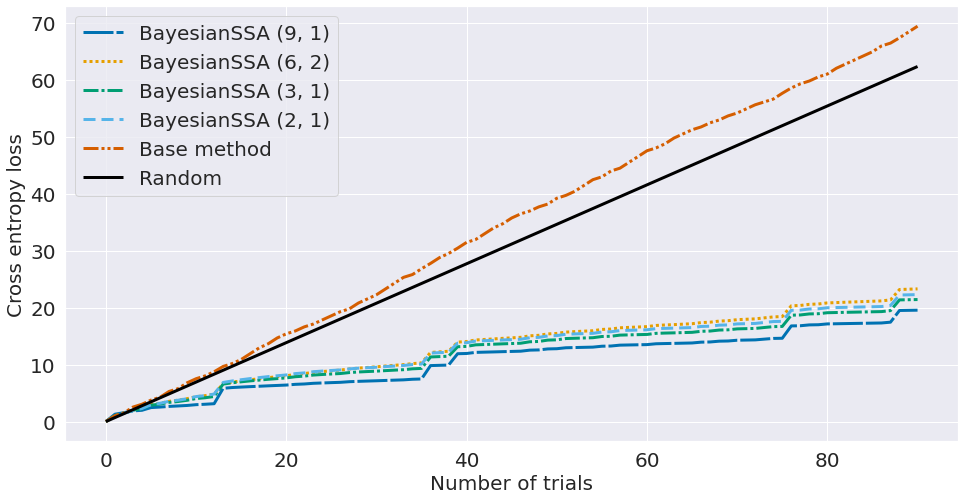

In [7]:
loss_df = pd.read_csv('../results/synth_cross_entropy.csv', index_col=0)
method_names = loss_df.columns.tolist()

fig, ax = plt.subplots(1, 1, figsize=(16, 8))
linestyles=[
    (0, (10, 1)),
    (0, (1, 1)),
    (0, (5, 1, 1, 1)),
    (0, (4, 2)),
    (0, (5, 1, 1, 1, 1, 1)),
    (0, (1, 0)),
]

colors = palette[4:5] + palette[0:1] + palette[2:3] + palette[1:2] + palette[5:6] + palette[7:8]
for i, method_name in enumerate(method_names):
    loss_df[method_name].plot.line(
        color=colors[i], 
        linestyle=linestyles[i],
        linewidth=3,
        ax=ax)
plt.xlabel('Number of trials', fontsize=20)
plt.ylabel('Cross entropy loss', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(method_names, fontsize=20)
plt.savefig('../results/Figures/synth_cross_entropy.pdf', bbox_inches="tight")
plt.savefig('../results/Figures/synth_cross_entropy.png', bbox_inches="tight")

In [8]:
# Losses at the final trial
loss_df.iloc[-1]

BayesianSSA (9, 1)    19.566228
BayesianSSA (6, 2)    23.308714
BayesianSSA (3, 1)    21.435110
BayesianSSA (2, 1)    22.299487
Base method           69.468400
Random                62.383246
Name: 90, dtype: float64

### Figure 3

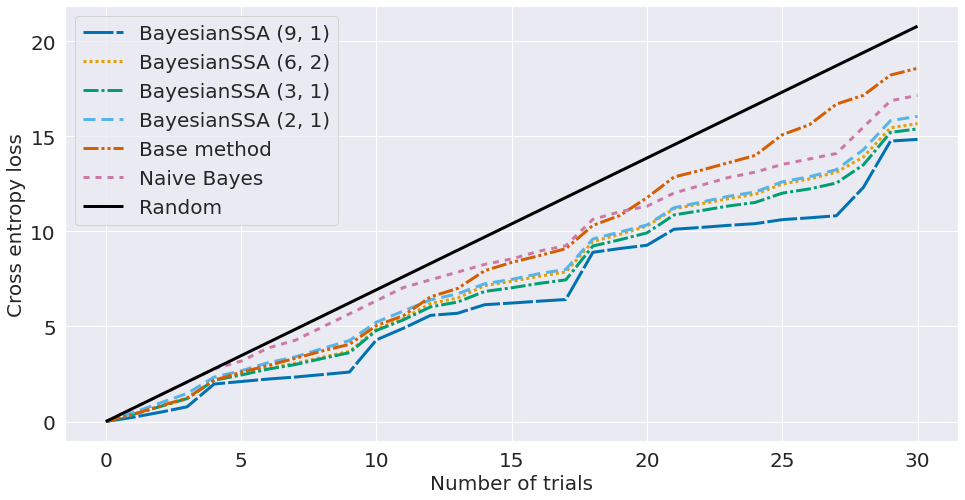

In [9]:
loss_df = pd.read_csv('../results/real_cross_entropy.csv', index_col=0)
method_names = loss_df.columns.tolist()

fig, ax = plt.subplots(1, 1, figsize=(16, 8))
linestyles=[
    (0, (10, 1)),
    (0, (1, 1)),
    (0, (5, 1, 1, 1)),
    (0, (4, 2)),
    (0, (5, 1, 1, 1, 1, 1)),
    (0, (2, 2)),
    (0, (1, 0)),
]

colors = palette[4:5] + palette[0:1] + palette[2:3] + palette[1:2] + palette[5:6] + palette[6:7] + palette[7:8]
for i, method_name in enumerate(method_names):
    loss_df[method_name].plot.line(
        color=colors[i], 
        linestyle=linestyles[i],
        linewidth=3,
        ax=ax)
plt.xlabel('Number of trials', fontsize=20)
plt.ylabel('Cross entropy loss', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(method_names, fontsize=20)
plt.savefig('../results/Figures/real_cross_entropy.pdf', bbox_inches="tight")
plt.savefig('../results/Figures/real_cross_entropy.png', bbox_inches="tight")

In [10]:
loss_df.iloc[-1]

BayesianSSA (9, 1)    14.839154
BayesianSSA (6, 2)    15.671682
BayesianSSA (3, 1)    15.390927
BayesianSSA (2, 1)    16.052013
Base method           18.580837
Naive Bayes           17.158780
Random                20.794415
Name: 30, dtype: float64

### Figure 4

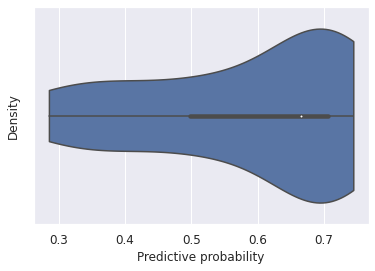

In [79]:
pred_probs = pd.read_csv('../results/new_perturb_pred_probs.csv', index_col=0)
sns.violinplot(x=pred_probs['0'], cut=0, inner="box")
plt.xlabel('Predictive probability', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xticks(fontsize=12)
plt.savefig('../results/Figures/new_perturb.pdf', bbox_inches="tight")
plt.savefig('../results/Figures/new_perturb.png', bbox_inches="tight")

In [12]:
pred_probs.median()

0    0.665424
dtype: float64

### Figure 2

In [13]:
import visualize_ecoli_cmp

In [14]:
def return_rgb(prob, norm, cmap):
    norm_value = norm(prob)
    rgba = cmap(norm_value)
    return rgba

In [15]:
def visualize_colorbar(norm, cmap, ax):
    mpl.colorbar.Colorbar(
        ax=ax,
        mappable=mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
        orientation="vertical",
    ).set_label("Positivity confidence value", fontsize=20)

In [16]:
def make_kwargs_dict(conf_srs, norm, cmap, zero_reactions):
    default_kwargs = {'color': 'black',
                      'width': 0.0125,
                      'alpha': 1.0,
                      'shape': 'left'}
    kwargs_dict = {
        'default': default_kwargs
    }
    zero_kwargs = default_kwargs.copy()
    a = 0.3
    zero_kwargs['color'] = (a, a, a, 1.0)
    zero_kwargs['width'] = 0.000001
    zero_kwargs['head_length'] = 0.02
    zero_kwargs['head_width'] = 0.01
    zero_kwargs['shape'] = 'full'
    for zero_reaction in zero_reactions:
        kwargs_dict[zero_reaction] = zero_kwargs
    for reaction in conf_srs.index.tolist():
        if not reaction in zero_reactions:
            conf = conf_srs[reaction]
            rgb = return_rgb(conf, norm, cmap)
            kwargs = default_kwargs.copy()
            kwargs['color'] = rgb
            kwargs_dict[reaction] = kwargs
    return kwargs_dict

In [17]:
def visualize_conf(conf_srs, norm, cmap, zero_reactions, ax):
    ECV = visualize_ecoli_cmp.EColiCMPVisualizer(ax=ax, fontsize=9)
    ECV.visualize_metabolites()
    kwargs_dict = make_kwargs_dict(conf_srs, norm, cmap, zero_reactions)
    ECV.visualize_reactions(kwargs_dict)

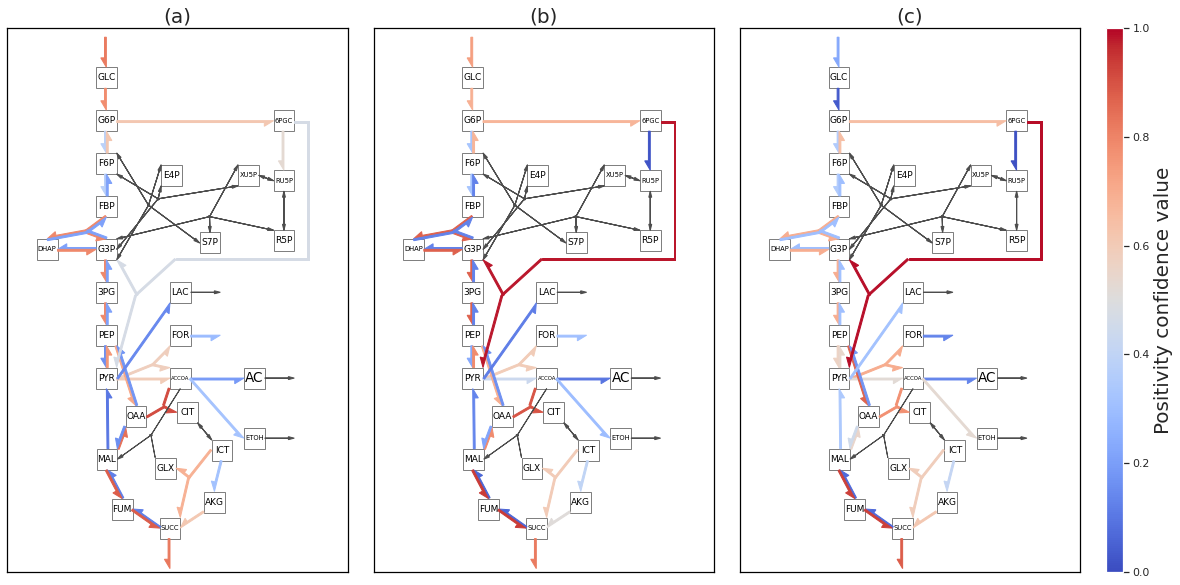

In [18]:
with open(f'../results/ssa_results.pkl', 'rb') as f:
    Q_consensus = pickle.load(f)
zero_reactions = Q_consensus.T[Q_consensus.loc['SUCCt'] == '0'].index.tolist()
p_confs = []
with open(f'../results/initial_confs.pkl', 'rb') as f:
    p_confs.append(pickle.load(f))
with open(f'../results/gnd_updated_confs.pkl', 'rb') as f:
    p_confs.append(pickle.load(f))
with open(f'../results/gnd_pts_updated_confs.pkl', 'rb') as f:
    p_confs.append(pickle.load(f))


norm = mpl.colors.Normalize(vmin=0.0, vmax=1.0)
cmap = plt.get_cmap("coolwarm")

fig, axes = plt.subplots(1, 4, figsize=(20, 10),
                         facecolor="white", edgecolor="black",
                         gridspec_kw=dict(height_ratios=[1], width_ratios=[20,20,20,1], wspace=0.1, hspace=0.3))
visualize_conf(p_confs[0]['positive'].loc['SUCCt'], norm, cmap, zero_reactions, axes[0])
axes[0].set_title('(a)', fontsize=20)
visualize_conf(p_confs[1]['positive'].loc['SUCCt'], norm, cmap, zero_reactions, axes[1])
axes[1].set_title('(b)', fontsize=20)
visualize_conf(p_confs[2]['positive'].loc['SUCCt'], norm, cmap, zero_reactions, axes[2])
axes[2].set_title('(c)', fontsize=20)
visualize_colorbar(norm, cmap, axes[-1])
plt.savefig('../results/Figures/confidence_transition.pdf', bbox_inches="tight")
plt.savefig('../results/Figures/confidence_transition.png', bbox_inches="tight")

### Table S4

In [19]:
pd.options.display.float_format = '{:.4e}'.format
L = 5

In [20]:
tmp = p_confs[0]['positive'].loc['SUCCt'].sort_values(ascending=False)
print(tmp.drop([f'CQ{i}' for i in range(L)]).drop(zero_reactions).to_latex())

\begin{tabular}{lr}
\toprule
{} &      SUCCt \\
\midrule
CS      & 9.1270e-01 \\
FRD     & 8.8220e-01 \\
FUM\_r   & 8.8220e-01 \\
NDH     & 8.6890e-01 \\
MDH     & 8.4000e-01 \\
SUCCt   & 8.2650e-01 \\
GLCt    & 8.1820e-01 \\
NADHDH  & 8.0770e-01 \\
GAPDH   & 7.9140e-01 \\
ENO     & 7.9140e-01 \\
PGK     & 7.9140e-01 \\
PGM     & 7.9140e-01 \\
ALD     & 7.9140e-01 \\
TPI\_r   & 7.9140e-01 \\
THD\_r   & 7.8990e-01 \\
PTS     & 7.7900e-01 \\
PPS     & 7.5590e-01 \\
PPC     & 7.1430e-01 \\
FDH     & 7.1430e-01 \\
ICL     & 6.8610e-01 \\
PGI\_r   & 6.1350e-01 \\
G6PDH   & 6.1350e-01 \\
SCS     & 6.1230e-01 \\
PDH     & 5.9550e-01 \\
PFL     & 5.8390e-01 \\
GND     & 5.3020e-01 \\
EDD     & 4.6980e-01 \\
ADK     & 4.6330e-01 \\
POX     & 4.5050e-01 \\
SCS\_r   & 3.8770e-01 \\
PGI     & 3.8650e-01 \\
PFK     & 3.8650e-01 \\
CYTBO   & 3.2730e-01 \\
ALDH    & 3.1920e-01 \\
ICDH    & 3.1390e-01 \\
ATPM    & 2.9310e-01 \\
CO2t    & 2.8570e-01 \\
FORt    & 2.8570e-01 \\
THD     & 2.1010e-01 \\
EN

### Table S5

In [21]:
tmp = p_confs[2]['positive'].loc['SUCCt'].sort_values(ascending=False)
print(tmp.drop([f'CQ{i}' for i in range(L)]).drop(zero_reactions).to_latex())

\begin{tabular}{lr}
\toprule
{} &      SUCCt \\
\midrule
EDD     & 9.9216e-01 \\
FRD     & 9.3087e-01 \\
FUM\_r   & 9.3087e-01 \\
NDH     & 9.0215e-01 \\
SUCCt   & 8.8060e-01 \\
PPC     & 8.6867e-01 \\
FDH     & 8.6867e-01 \\
CS      & 7.6992e-01 \\
NADHDH  & 7.4237e-01 \\
PFL     & 7.0145e-01 \\
GAPDH   & 6.9603e-01 \\
ALD     & 6.9603e-01 \\
PGK     & 6.9603e-01 \\
PGM     & 6.9603e-01 \\
TPI\_r   & 6.9603e-01 \\
ENO     & 6.9603e-01 \\
PGI\_r   & 6.4605e-01 \\
G6PDH   & 6.4605e-01 \\
SCS     & 6.1495e-01 \\
THD\_r   & 6.0471e-01 \\
ICL     & 5.8966e-01 \\
PYK     & 5.6871e-01 \\
MDH     & 5.4890e-01 \\
POX     & 5.4673e-01 \\
PPS     & 5.4563e-01 \\
ALDH    & 5.2737e-01 \\
PDH     & 5.2213e-01 \\
ADK     & 4.8118e-01 \\
MDH\_r   & 4.5110e-01 \\
ICDH    & 4.1034e-01 \\
ATPM    & 3.9895e-01 \\
THD     & 3.9529e-01 \\
SCS\_r   & 3.8505e-01 \\
PGI     & 3.5395e-01 \\
PFK     & 3.5395e-01 \\
ME1     & 3.4051e-01 \\
ME2     & 3.4038e-01 \\
LDH     & 3.1621e-01 \\
TPI     & 3.0397e-01 \\
F

### Figure 5

In [22]:
with open(f'../results/real_updated_confs.pkl', 'rb') as f:
    r_conf = pickle.load(f)

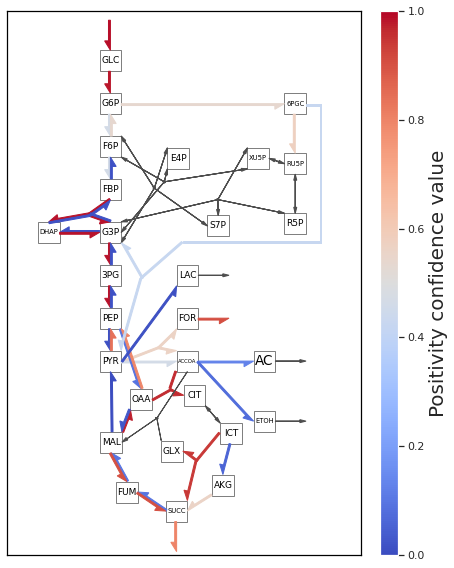

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(7, 10),
                         facecolor="white", edgecolor="black",
                         gridspec_kw=dict(height_ratios=[1], width_ratios=[20,1], wspace=0.1, hspace=0.3))
visualize_conf(r_conf['positive'].loc['SUCCt'], 
               norm, cmap, zero_reactions, axes[0])
visualize_colorbar(norm, cmap, axes[-1])
plt.savefig('../results/Figures/real_confidence.pdf', bbox_inches="tight")
plt.savefig('../results/Figures/real_confidence.png', bbox_inches="tight")

### Figure 6

In [24]:
def closest(r1, xs, n_mesh):
    min_x_ind = round((r1 - xs[0]) / ((xs[-1] - xs[0]) / (n_mesh-1)))
    return min_x_ind


In [25]:
def make_z(rs, ws, xs, ys, n_mesh):
    z = np.zeros((n_mesh, n_mesh))
    ans = 0
    for p, r in enumerate(rs):
        closest_x_ind = closest(r[0], xs, n_mesh)
        closest_y_ind = closest(r[1], ys, n_mesh)
        z[closest_x_ind][closest_y_ind] += ws[p]
    return z

In [26]:
def visualize_contour(rs, ws, x_min, x_max, y_min, y_max, n_mesh, ax):
    xs = np.linspace(x_min, x_max, n_mesh)
    ys = np.linspace(y_min, y_max, n_mesh)
    z = make_z(rs, ws, xs, ys, n_mesh)
    x, y = np.meshgrid(xs, ys)
    ctf = ax.contourf(x, y, z, cmap='rainbow', 
                      vmin=0.0, vmax=0.05, zorder=1)
    ax.contour(x, y, z, colors='black', linewidths=0.5, zorder=1.1)
    # ax.clabel(fmt='%1.5f', fontsize=16)
    return ctf

In [54]:
import numpy as np

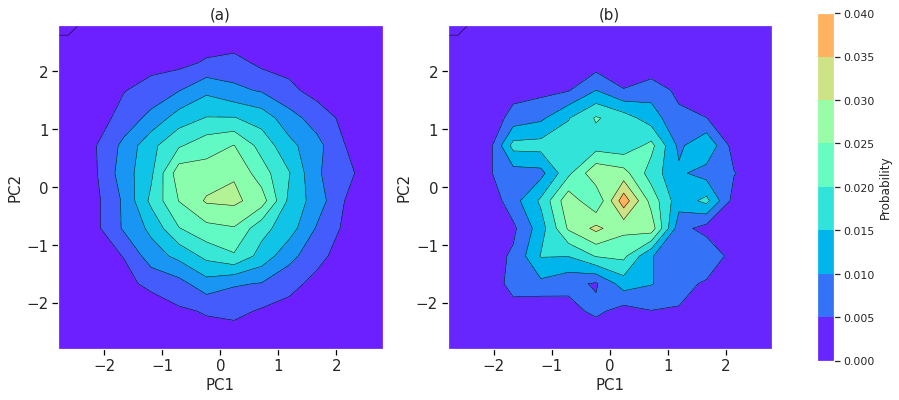

In [80]:
X_new = pd.read_csv('../results/pca_r_vecs.csv', index_col=0)
weights = pd.read_csv('../results/weights_for_pca.csv', index_col=0)
X_new = X_new.iloc[:, :2].to_numpy()
weights = weights.to_numpy().reshape(-1)

fig, axes = plt.subplots(1, 2, figsize=(16, 6.4))
n_mesh = 22
fontsize = 15
x_min = -5
x_max = 5
y_min = -5
y_max = 5
ax = axes[0]
prior_weights = np.ones_like(weights) / len(weights)
_ =  visualize_contour(
    X_new, prior_weights, x_min, x_max, y_min, y_max, n_mesh, ax)
ax.set_title('(a)', fontsize=fontsize)
ax.set_xlabel('PC1', fontsize=fontsize)
ax.set_ylabel('PC2', fontsize=fontsize)
# ax.set_xticks(fontsize=fontsize)
# ax.set_yticks(fontsize=fontsize)
lim = 2.8
ax.set_xlim([-lim, lim])
ax.set_ylim([-lim, lim])
ax.tick_params(labelsize=fontsize,
               direction='out', color='black', bottom=True, left=True)
ax.set_aspect('equal')

ax = axes[1]
ctf =  visualize_contour(
    X_new, weights, x_min, x_max, y_min, y_max, n_mesh, ax)
ax.set_title('(b)', fontsize=fontsize)
ax.set_xlabel('PC1', fontsize=fontsize)
ax.set_ylabel('PC2', fontsize=fontsize)
# ax.set_xticks(fontsize=fontsize)
# ax.set_yticks(fontsize=fontsize)
ax.set_xlim([-lim, lim])
ax.set_ylim([-lim, lim])
ax.tick_params(labelsize=fontsize, 
               direction='out', color='black', bottom=True, left=True)
ax.set_aspect('equal')
# plt.sca(ax)
plt.colorbar(ctf, label="Probability", ax=axes)
plt.savefig('../results/Figures/r_posterior.pdf', bbox_inches="tight")
plt.savefig('../results/Figures/r_posterior.png', bbox_inches="tight")

In [30]:
X_new = pd.read_csv('../results/pca_r_vecs.csv', index_col=0)
weights = pd.read_csv('../results/weights_for_pca.csv', index_col=0)

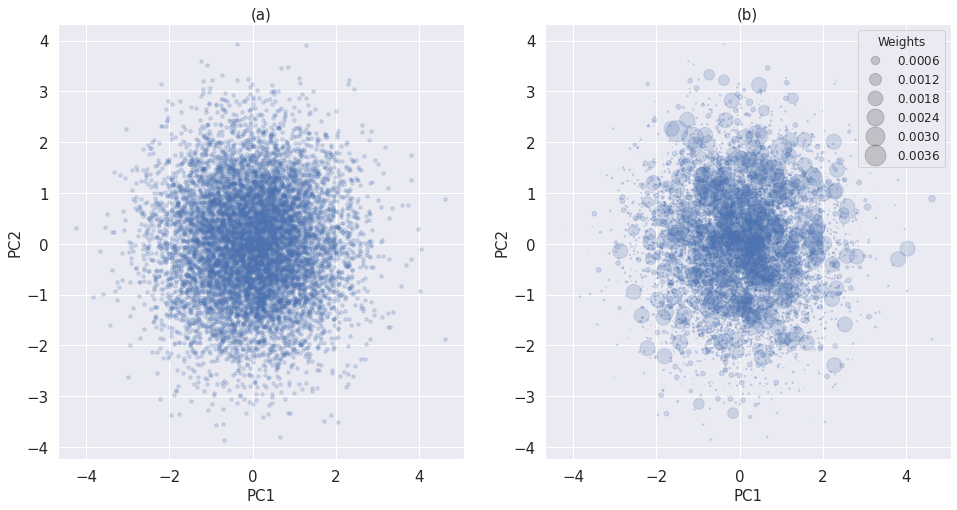

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
fontsize = 15
radius = 12
x_axis = '0'
y_axis = '1'
plt.sca(axes[0])
axes[0].scatter(X_new[x_axis], X_new[y_axis], alpha=0.2, s=radius)
plt.title('(a)', fontsize=fontsize)
plt.xlabel('PC1', fontsize=fontsize)
plt.ylabel('PC2', fontsize=fontsize)
_ = plt.xticks(fontsize=fontsize)
_ = plt.yticks(fontsize=fontsize)
plt.sca(axes[1])
scatter = axes[1].scatter(X_new[x_axis], X_new[y_axis], alpha=0.2, s=radius *weights*1.0e4)
plt.title('(b)', fontsize=fontsize)
plt.xlabel('PC1', fontsize=fontsize)
plt.ylabel('PC2', fontsize=fontsize)
_ = plt.xticks(fontsize=fontsize)
_ = plt.yticks(fontsize=fontsize)
# legend
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.2, num=6, func=lambda s: s/radius/1.0e4)
legend2 = axes[1].legend(handles, labels, loc="upper right", title="Weights", title_fontsize=12, fontsize=12)
# plt.savefig('../results/Figures/r_posterior.pdf', bbox_inches="tight")

### Table S6

In [32]:
tmp = r_conf['positive'].loc['SUCCt'].sort_values(ascending=False)[:]
print(tmp.drop([f'CQ{i}' for i in range(L)]).drop(zero_reactions).to_latex())

\begin{tabular}{lr}
\toprule
{} &      SUCCt \\
\midrule
GLCt    & 9.8965e-01 \\
ALD     & 9.8709e-01 \\
TPI\_r   & 9.8709e-01 \\
GAPDH   & 9.8709e-01 \\
PGM     & 9.8709e-01 \\
ENO     & 9.8709e-01 \\
PGK     & 9.8709e-01 \\
PTS     & 9.8381e-01 \\
MDH     & 9.7380e-01 \\
CS      & 9.6357e-01 \\
THD\_r   & 9.4574e-01 \\
ICL     & 9.4262e-01 \\
NDH     & 9.1748e-01 \\
CO2t    & 9.0747e-01 \\
FORt    & 9.0747e-01 \\
FRD     & 9.0544e-01 \\
FUM\_r   & 9.0544e-01 \\
PPS     & 8.3850e-01 \\
NADHDH  & 8.0402e-01 \\
SUCCt   & 7.9912e-01 \\
PCK     & 7.9559e-01 \\
GND     & 5.7501e-01 \\
PFL     & 5.6591e-01 \\
SCS     & 5.6194e-01 \\
G6PDH   & 5.3732e-01 \\
PGI\_r   & 5.3732e-01 \\
ADK     & 5.0079e-01 \\
PDH     & 4.6290e-01 \\
PFK     & 4.6268e-01 \\
PGI     & 4.6268e-01 \\
SCS\_r   & 4.3806e-01 \\
EDD     & 4.2499e-01 \\
POX     & 2.6887e-01 \\
ATPM    & 1.6815e-01 \\
CYTBO   & 1.6631e-01 \\
PTA     & 1.2527e-01 \\
FUM     & 9.4564e-02 \\
SDH     & 9.4564e-02 \\
PPC     & 9.2534e-02 \\
FD

### Figure S1

In [33]:
with open(f'../results/real_updated_rln_confs.pkl', 'rb') as f:
    rln_conf = pickle.load(f)

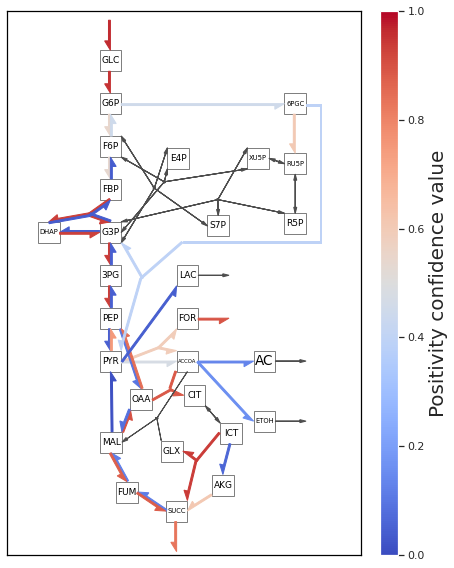

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(7, 10),
                         facecolor="white", edgecolor="black",
                         gridspec_kw=dict(height_ratios=[1], width_ratios=[20,1], wspace=0.1, hspace=0.3))
visualize_conf(rln_conf['positive'].loc['SUCCt'], 
               norm, cmap, zero_reactions, axes[0])
visualize_colorbar(norm, cmap, axes[-1])
plt.savefig('../results/Figures/real_rln_confidence.pdf', bbox_inches="tight")
plt.savefig('../results/Figures/real_rln_confidence.png', bbox_inches="tight")

### Table S7

In [35]:
tmp = rln_conf['positive'].loc['SUCCt'].sort_values(ascending=False)[:]
print(tmp.drop([f'CQ{i}' for i in range(L)]).drop(zero_reactions).to_latex())

\begin{tabular}{lr}
\toprule
{} &      SUCCt \\
\midrule
GLCt    & 9.6239e-01 \\
PTS     & 9.5010e-01 \\
ICL     & 9.3958e-01 \\
GAPDH   & 9.3824e-01 \\
PGK     & 9.3795e-01 \\
PGM     & 9.3608e-01 \\
ALD     & 9.3424e-01 \\
ENO     & 9.3101e-01 \\
TPI\_r   & 9.3037e-01 \\
MDH     & 9.0591e-01 \\
CO2t    & 8.9606e-01 \\
FORt    & 8.9499e-01 \\
CS      & 8.8738e-01 \\
FRD     & 8.8063e-01 \\
FUM\_r   & 8.7741e-01 \\
THD\_r   & 8.6143e-01 \\
PCK     & 8.4588e-01 \\
NDH     & 8.3607e-01 \\
SUCCt   & 8.3580e-01 \\
PPS     & 7.4961e-01 \\
NADHDH  & 6.3783e-01 \\
SCS     & 6.1182e-01 \\
GND     & 6.0631e-01 \\
PFL     & 5.9157e-01 \\
PGI     & 5.4369e-01 \\
PFK     & 5.3852e-01 \\
ADK     & 5.2466e-01 \\
PDH     & 4.7393e-01 \\
G6PDH   & 4.4985e-01 \\
PGI\_r   & 4.4899e-01 \\
EDD     & 3.9199e-01 \\
SCS\_r   & 3.8119e-01 \\
ATPM    & 3.2834e-01 \\
POX     & 2.9159e-01 \\
CYTBO   & 2.3841e-01 \\
NDH\_r   & 1.6154e-01 \\
ALDH    & 1.5794e-01 \\
PTA     & 1.3126e-01 \\
THD     & 1.2863e-01 \\
F

In [36]:
r_top_cands = r_conf['positive'].loc['SUCCt'].drop([f'CQ{i}' for i in range(L)]).drop(zero_reactions).sort_values(ascending=False)
rln_top_cands = rln_conf['positive'].loc['SUCCt'].drop([f'CQ{i}' for i in range(L)]).drop(zero_reactions).sort_values(ascending=False)

In [37]:
r_set = set(r_top_cands[r_top_cands > 0.85].index)

In [38]:
r_set

{'ALD',
 'CO2t',
 'CS',
 'ENO',
 'FORt',
 'FRD',
 'FUM_r',
 'GAPDH',
 'GLCt',
 'ICL',
 'MDH',
 'NDH',
 'PGK',
 'PGM',
 'PTS',
 'THD_r',
 'TPI_r'}

In [39]:
rln_set = set(rln_top_cands[rln_top_cands > 0.85].index)

In [40]:
rln_set

{'ALD',
 'CO2t',
 'CS',
 'ENO',
 'FORt',
 'FRD',
 'FUM_r',
 'GAPDH',
 'GLCt',
 'ICL',
 'MDH',
 'PGK',
 'PGM',
 'PTS',
 'THD_r',
 'TPI_r'}

### Table S1

In [41]:
metab_abb = pd.read_csv('../data/metabolite_abbreviations.csv', header=None, index_col=0)
metab_abb = metab_abb.sort_index()[1]
metab_abb.name = None
metab_abb.index.name = None

In [42]:
print(metab_abb.to_latex())

\begin{tabular}{ll}
\toprule
{} &                                        0 \\
\midrule
AC      &                                  Acetate \\
ACALD   &                             Acetaldehyde \\
ACCOA   &                               Acetyl-CoA \\
ACON    &                            Cis-aconitate \\
ACTP    &                         Acetyl phosphate \\
AKG     &                          α-ketoglutarate \\
CIT     &                                  Citrate \\
DHAP    &                Dihydroxyacetonephosphate \\
E4P     &                    Erythrose-4-phosphate \\
ETOH    &                                  Ethanol \\
F6P     &                     Fructose-6-phosphate \\
FBP     &                Fructose-1,6-bisphosphate \\
FOR     &                                  Formate \\
FUM     &                                 Fumarate \\
G3P     &               Glyceraldehyde-3-phosphate \\
G6P     &                      Glucose-6-phosphate \\
GLC     &                                  Glucos

### Table S2

In [43]:
parser = bayesianssa.ReactionFormulaParser(
    f'../data/SSDesignSuppTable.csv',
    ignored_reactions=['BIO'],
    ignored_metabolites=['Export'])
parser.parse()
nu = parser.nu
nu = bayesianssa.remove_non_flow_metabolites(nu)

H[c], NH3[c] do not flow.


In [44]:
nu.index = [metab.replace('[c]', '') for metab in nu.index.tolist()]

In [45]:
nu.index = [metab.replace('_', '') for metab in nu.index.tolist()]

In [46]:
stos = []
for reac in nu.columns.tolist():
    sto = [nu.loc[nu[reac] < 0, reac], nu.loc[nu[reac] > 0, reac]]
    stos.append(sto)

In [47]:
reac_forms = []
for sto in stos:
    str_list = []
    left_list = []
    for metab, coef in zip(sto[0].index.tolist(), sto[0].tolist()):
        if coef == -1:
            left_list.append(f'{metab}')
        else:
            left_list.append(f'{coef*(-1)} {metab}')
    if len(left_list) == 0:
        left_list.append('(Import)')
    str_list.append(' + '.join(left_list))
    str_list.append('→')
    right_list = []
    for metab, coef in zip(sto[1].index.tolist(), sto[1].tolist()):
        if coef == 1:
            right_list.append(f'{metab}')
        else:
            right_list.append(f'{coef} {metab}')
    if len(right_list) == 0:
        right_list.append('(Export)')
    str_list.append(' + '.join(right_list))
    reac_form = ' '.join(str_list)
    reac_forms.append(reac_form)

In [48]:
reac_df = pd.Series(reac_forms, index=nu.columns)

In [49]:
print(reac_df.to_latex())

\begin{tabular}{ll}
\toprule
{} &                                      0 \\
\midrule
ACK     &                  ACTP + ADP → AC + ATP \\
ACN1    &                             CIT → ACON \\
ACN1\_r  &                             ACON → CIT \\
ACN2    &                             ACON → ICT \\
ACN2\_r  &                             ICT → ACON \\
ACt     &                          AC → (Export) \\
ADH     &              ACALD + NADH → ETOH + NAD \\
ADK     &                      AMP + ATP → 2 ADP \\
AKGDH   &  AKG + COA + NAD → CO2 + NADH + SUCCOA \\
ALD     &                       FBP → DHAP + G3P \\
ALDH    &       ACCOA + NADH → ACALD + COA + NAD \\
ALD\_r   &                       DHAP + G3P → FBP \\
ATPM    &                              ATP → ADP \\
CO2t    &                         CO2 → (Export) \\
CS      &                ACCOA + OAA → CIT + COA \\
CYTBO   &                  ADP + Q8H2 → ATP + Q8 \\
EDA     &                     2DDG6P → G3P + PYR \\
EDD     &                   

### Table S3

In [50]:
equations = []
reac_names = []
for info in visualize_ecoli_cmp.cmp_reaction_infos:
    reac_name = info[0][0]
    reac_names.append(reac_name)
    left = info[1]
    right = info[2]
    equ_list = []
    if type(left) == str:
        equ_list.append(left)
    else:
        equ_list.append(' + '.join(left))
    if type(right) == str:
        equ_list.append(right)
    else:
        equ_list.append(' + '.join(right))
    equation = ' → '.join(equ_list)
    equations.append(equation)

In [51]:
print(pd.Series(reac_names, index=equations).to_latex())

\begin{tabular}{ll}
\toprule
{} &        0 \\
\midrule
GLC → G6P              &      PTS \\
G6P → F6P              &      PGI \\
F6P → G6P              &    PGI\_r \\
F6P → FBP              &      PFK \\
FBP → F6P              &      FBP \\
FBP → DHAP + G3P       &      ALD \\
DHAP + G3P → FBP       &    ALD\_r \\
G3P → DHAP             &      TPI \\
DHAP → G3P             &    TPI\_r \\
G3P → 3PG              &    GAPDH \\
3PG → G3P              &  GAPDH\_r \\
3PG → PEP              &      PGM \\
PEP → 3PG              &    PGM\_r \\
PEP → PYR              &      PYK \\
PYR → PEP              &      PPS \\
PYR → ACCOA + FOR      &      PFL \\
PYR → ACCOA            &      PDH \\
G6P → 6PGC             &    G6PDH \\
6PGC → RU5P            &      GND \\
RU5P → XU5P            &      RPE \\
XU5P → RU5P            &    RPE\_r \\
RU5P → R5P             &      RPI \\
R5P → RU5P             &    RPI\_r \\
XU5P + R5P → G3P + S7P &     TKT1 \\
G3P + S7P → XU5P + R5P &   TKT1\_r \\
S7P + G3P → 